# Лабораторная №1, Вербин Кирилл гр. 9383

## Начало работы

### Вспомогательные функции

In [1]:
import pandas as pd
import numpy as np
import pathlib
from sklearn import preprocessing
import matplotlib.pyplot as plt

def MyScaler(data, min, max):
    delta, zero_point = max-min, min
    data_max_abs_scaled = preprocessing.MinMaxScaler().fit_transform(data)
    data_my_scaled = np.array(list(map(lambda values: np.array(list(map(lambda x: x * delta + zero_point, values))),data_max_abs_scaled.T))).T
    return  pd.DataFrame(
        data_my_scaled,
        columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
    )

def show_intervals(bin_edges):
    tmp_arr = []
    for column in bin_edges:
        tmp_col = []
        for index in range(len(column) - 1):
            tmp_col.append([column[index], column[index+1]])
        tmp_arr.append(tmp_col)
    return pd.DataFrame(
        data=tmp_arr,
        index=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
    ).T.round(2).replace(np.nan, '')

def plot_data_frame(data):
    n_bins = 20
    _, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
    axs[0, 0].hist(data['age'].values, bins=n_bins)
    axs[0, 0].set_title('age')
    axs[0, 1].hist(data['creatinine_phosphokinase'].values, bins=n_bins)
    axs[0, 1].set_title('creatinine_phosphokinase')
    axs[0, 2].hist(data['ejection_fraction'].values, bins=n_bins)
    axs[0, 2].set_title('ejection_fraction')
    axs[1, 0].hist(data['platelets'].values, bins=n_bins)
    axs[1, 0].set_title('platelets')
    axs[1, 1].hist(data['serum_creatinine'].values, bins=n_bins)
    axs[1, 1].set_title('serum_creatinine')
    axs[1, 2].hist(data['serum_sodium'].values, bins=n_bins)
    axs[1, 2].set_title('serum_sodium')
    plt.show()

### Загрузка данных

In [2]:
path = pathlib.Path("data","heart_failure_clinical_records_dataset.csv" )
df = pd.read_csv(path)
df = df.drop(columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])
print(df) #Вывод датафрейма с данными для лаб. работы. Должно быть 299 наблюдений и 6 признаков


      age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3    50.0                       111                 20  210000.00   
4    65.0                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                        61                 38  155000.00   
295  55.0                      1820                 38  270000.00   
296  45.0                      2060                 60  742000.00   
297  45.0                      2413                 38  140000.00   
298  50.0                       196                 45  395000.00   

     serum_creatinine  serum_sodium  
0                 1.9           130  
1                 1.1           136  
2                 1.3           129  
3                 1

### Визуализация данных

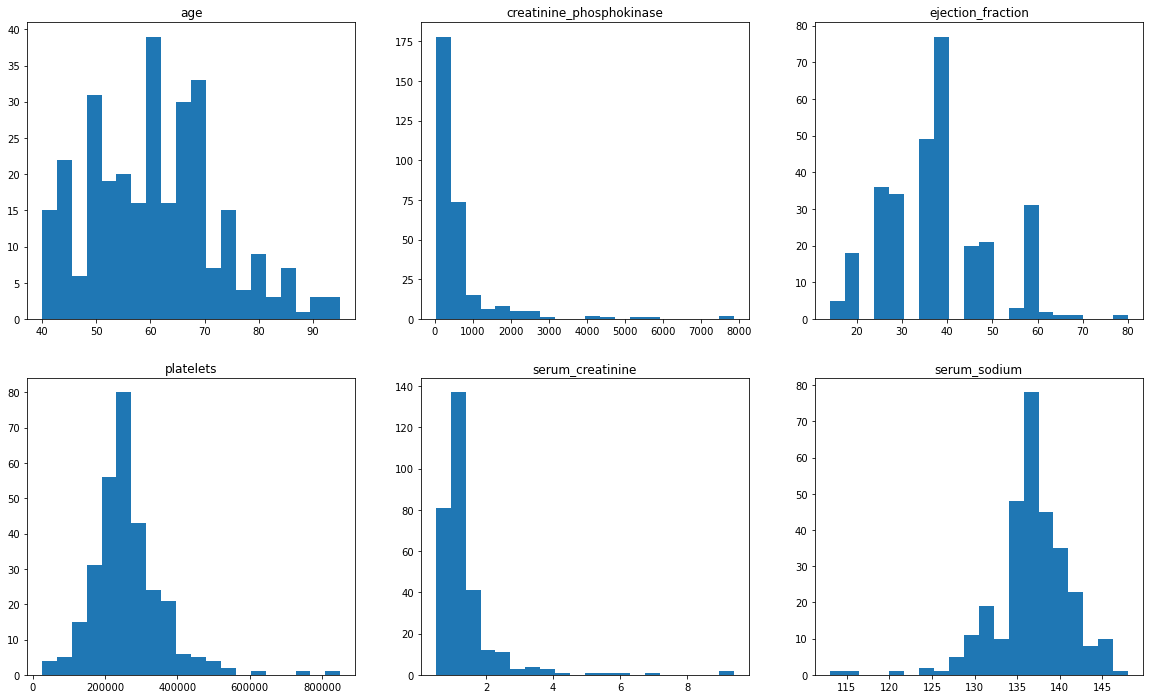

In [3]:
plot_data_frame(df)

## Масштабирование данных

### Масштабирование по первым 150 записям

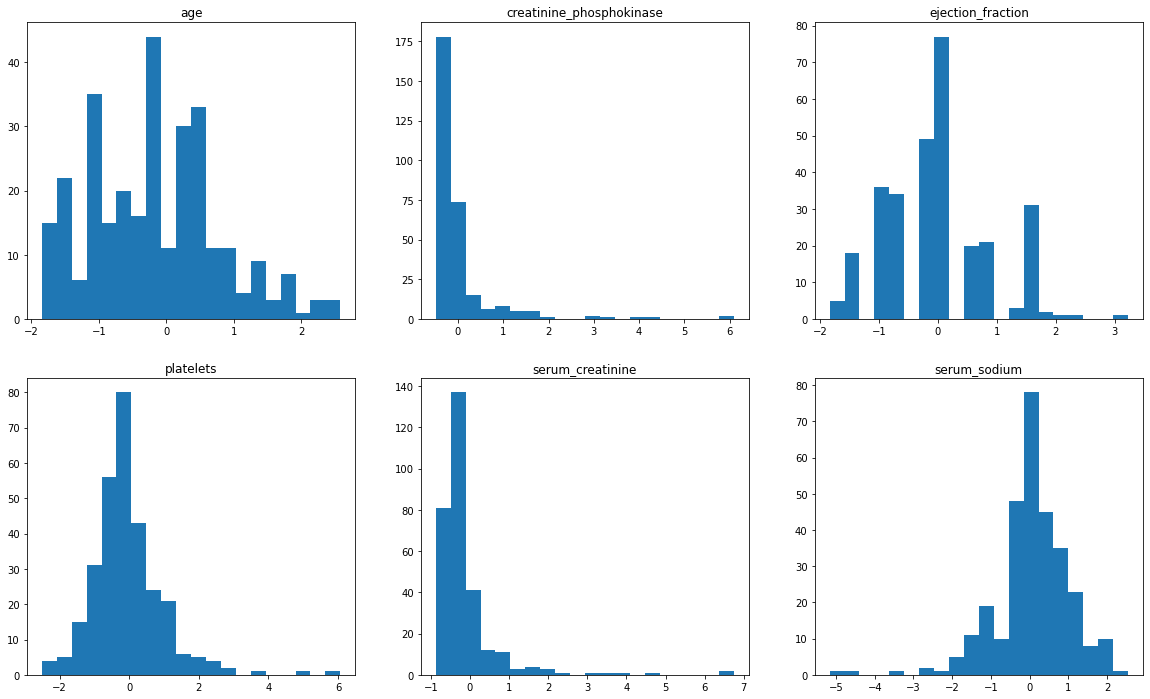

In [4]:
data = df.to_numpy(dtype='float')
scaler_150 = preprocessing.StandardScaler().fit(data[:150,:])
data_scaled_150 = scaler_150.transform(data)
df_scaled_150 = pd.DataFrame(data=data_scaled_150, columns=[
    'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'
])
plot_data_frame(df_scaled_150)

### Масштабирование по всем записям

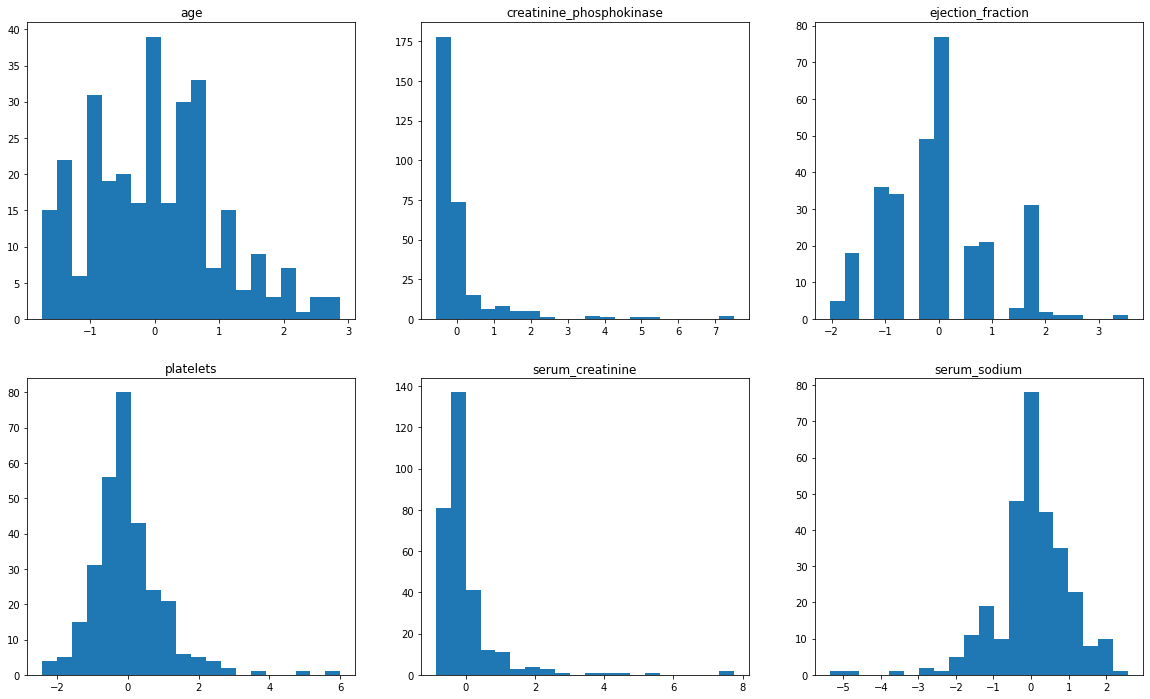

In [5]:
scaler_all = preprocessing.StandardScaler().fit(data)
data_scaled_all = scaler_all.transform(data)
df_scaled_all = pd.DataFrame(data=data_scaled_all, columns=[
    'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'
])
plot_data_frame(df_scaled_all)

### Сравнительный анализ статистик mean и var после масштабирования

In [6]:
pd.concat([
    df.mean(),
    df.std(),
    df_scaled_150.mean(),
    df_scaled_150.std(),
    df_scaled_all.mean(),
    df_scaled_all.std(),
], axis=1, keys=[
    "mean",
    "std",
    "scaled partial mean",
    "scaled partial std",
    "scaled mean",
    "scaled std",
]
).round(3)


,mean,std,scaled partial mean,scaled partial std,scaled mean,scaled std
age,60.834,11.895,-0.170,0.955,0.0,1.002
creatinine_phosphokinase,581.839,970.288,-0.021,0.816,0.0,1.002
ejection_fraction,38.084,11.835,0.011,0.908,0.0,1.002
platelets,263358.029,97804.237,-0.035,1.017,0.0,1.002
serum_creatinine,1.394,1.035,-0.109,0.887,-0.0,1.002
serum_sodium,136.625,4.412,0.038,0.972,-0.0,1.002


### Привидение к диапазону с помощью MinMaxScaler

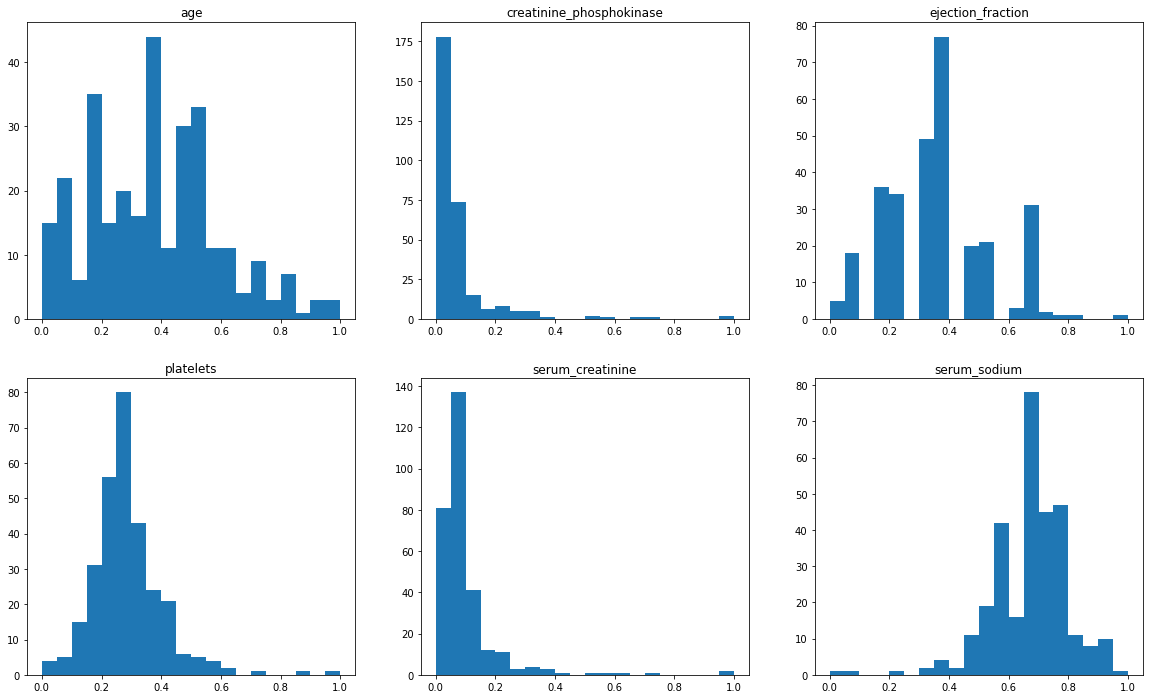

In [7]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_min_max_scaled = min_max_scaler.transform(data)
df_min_max_scaled = pd.DataFrame(data=data_min_max_scaled, columns=[
    'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'
])
plot_data_frame(df_min_max_scaled)

In [8]:
pd.DataFrame(
    {"scaler min": min_max_scaler.data_min_, "scaler max": min_max_scaler.data_max_},
    index=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
).T.round(2)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
scaler min,40.0,23.0,14.0,25100.0,0.5,113.0
scaler max,95.0,7861.0,80.0,850000.0,9.4,148.0


### Привидение к диапазону с помощью MaxAbsScaler

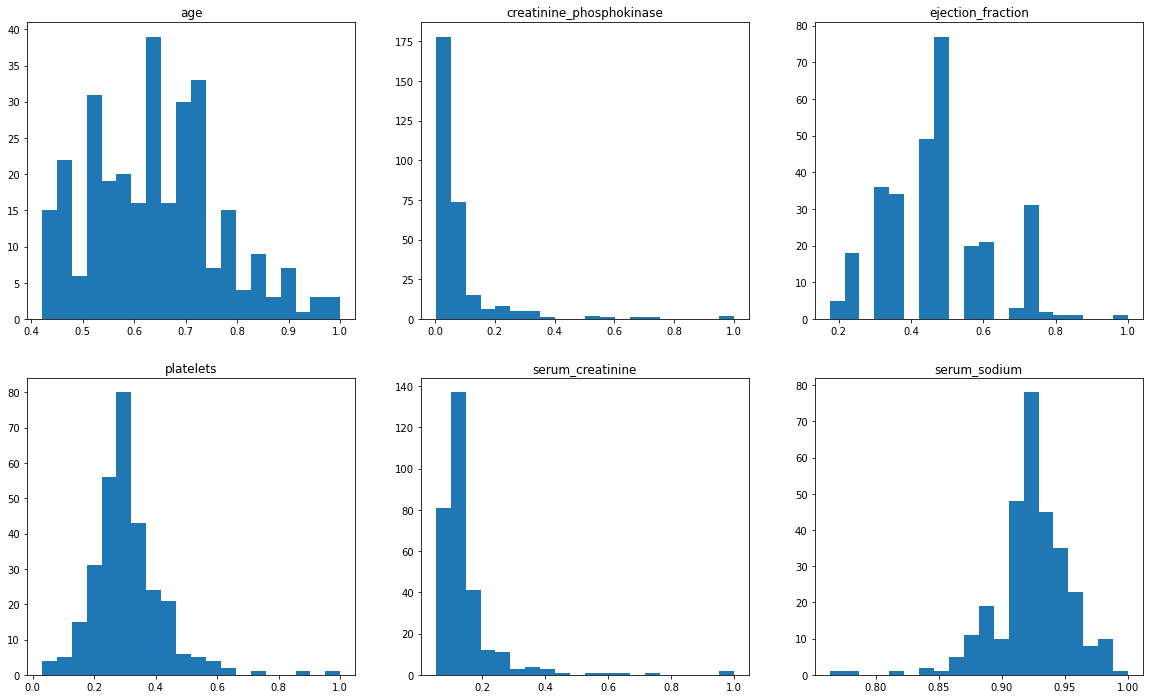

In [9]:
max_abs_scaler = preprocessing.MaxAbsScaler().fit(data)
data_max_abs_scaled = max_abs_scaler.transform(data)
df_max_abs_scaled = pd.DataFrame(data=data_max_abs_scaled, columns=[
    'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'
])
plot_data_frame(df_max_abs_scaled)

### Привидение к диапазону с помощью RobustScaler

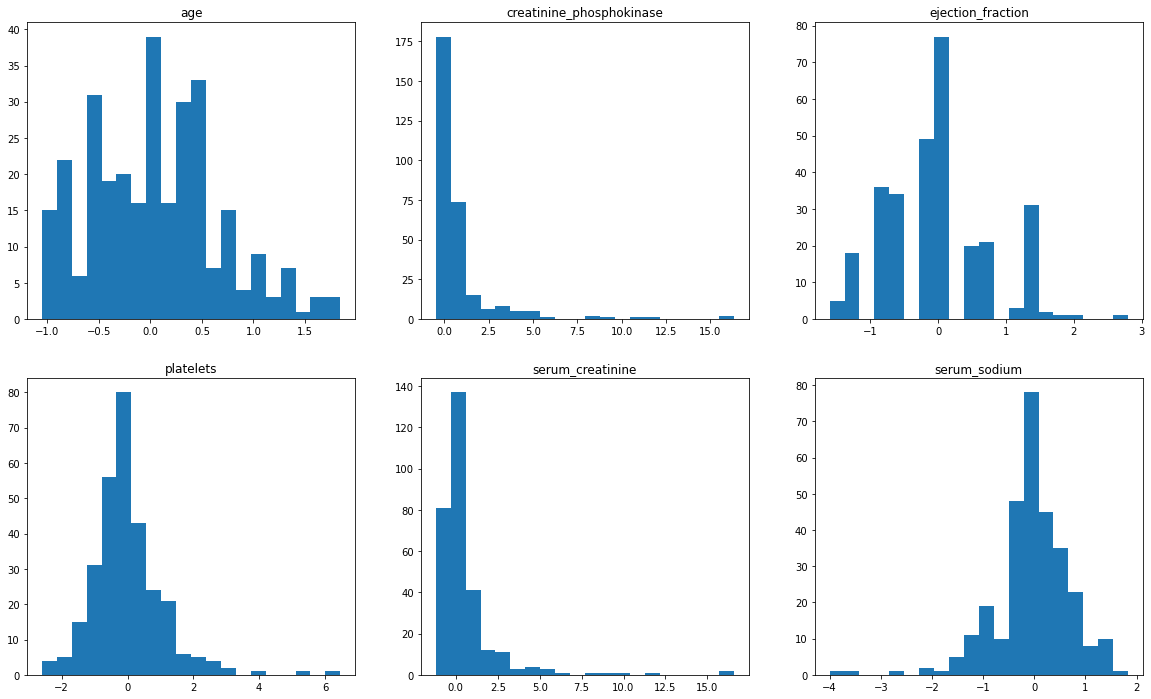

In [10]:
robust_scaler = preprocessing.RobustScaler().fit(data)
data_robust_scaled = robust_scaler.transform(data)
df_robust_scaled = pd.DataFrame(data=data_robust_scaled, columns=[
    'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'
])
plot_data_frame(df_robust_scaled)

### Привидение к диапазону [-5, 10]

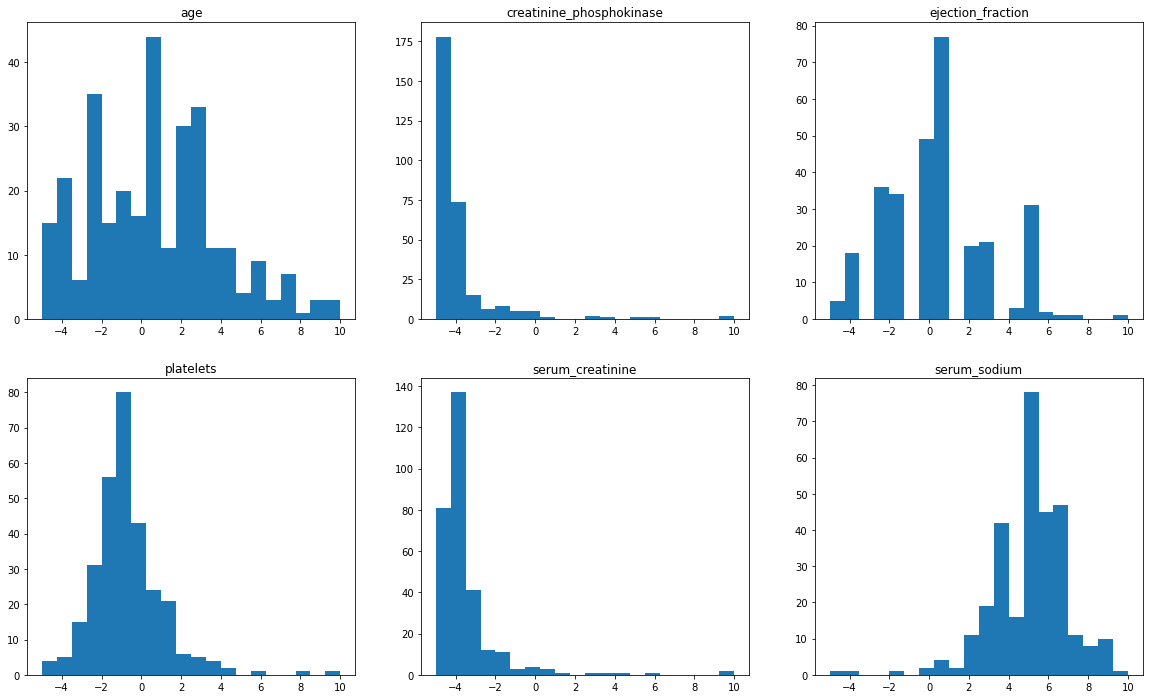

In [11]:
df_my_scaled = MyScaler(data, -5, 10)
plot_data_frame(df_my_scaled)

In [12]:
pd.concat([df_my_scaled.min(), df_my_scaled.max() ], axis=1, keys=["min", "max"])

,min,max
age,-5.0,10.0
creatinine_phosphokinase,-5.0,10.0
ejection_fraction,-5.0,10.0
platelets,-5.0,10.0
serum_creatinine,-5.0,10.0
serum_sodium,-5.0,10.0


## Нелинейные преобразования

### Приведение к нормальному распределению

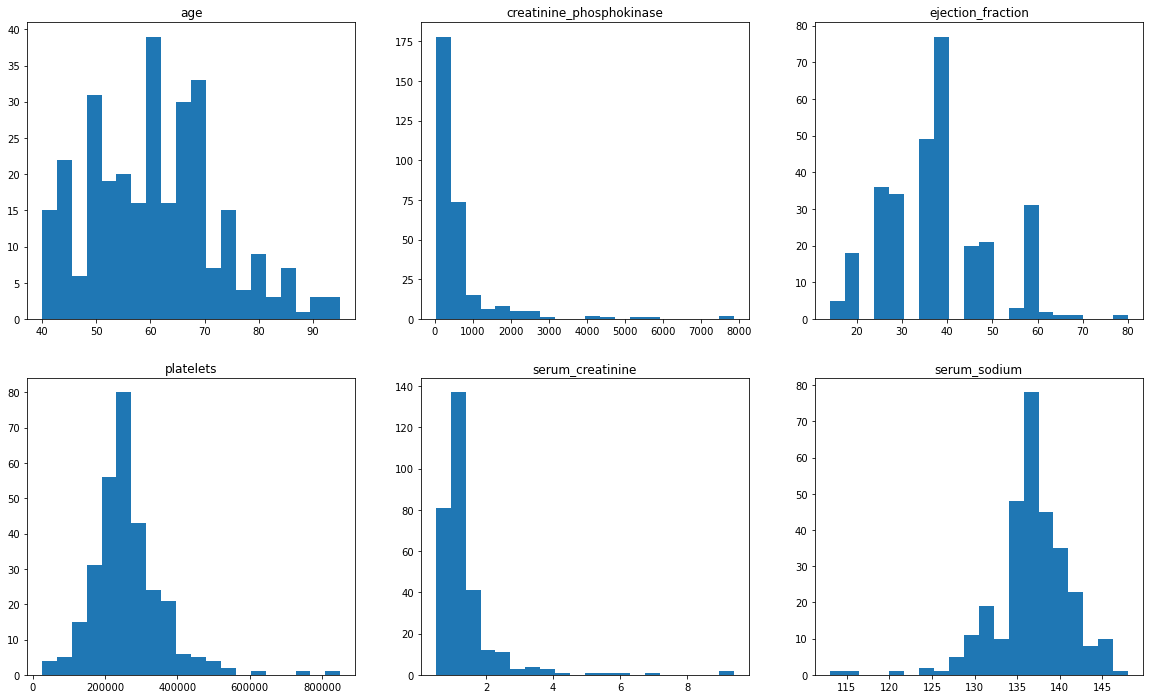

In [13]:
quantile_transformer = preprocessing.QuantileTransformer(n_quantiles = 100,random_state=0).fit(data)
data_quantile_scaled = quantile_transformer.transform(data)
df_quantile_scaled = pd.DataFrame(data=data_quantile_scaled, columns=[
    'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'
])
plot_data_frame(df)

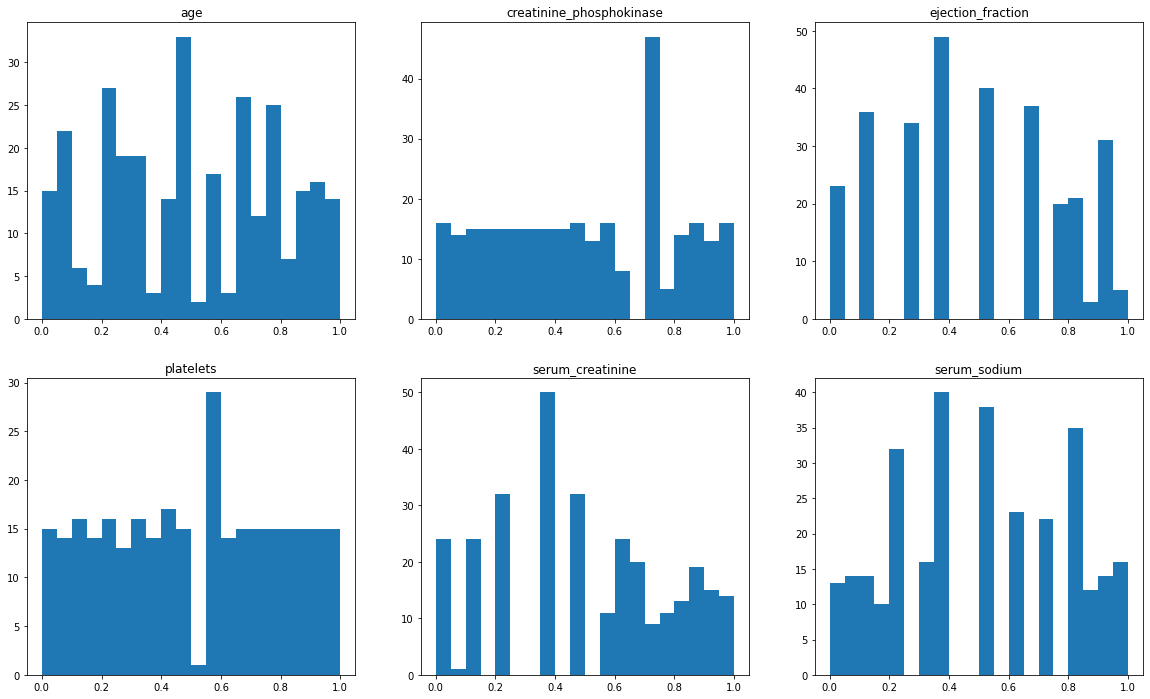

In [14]:
plot_data_frame(df_quantile_scaled)


### Приведение к нормальному распределению

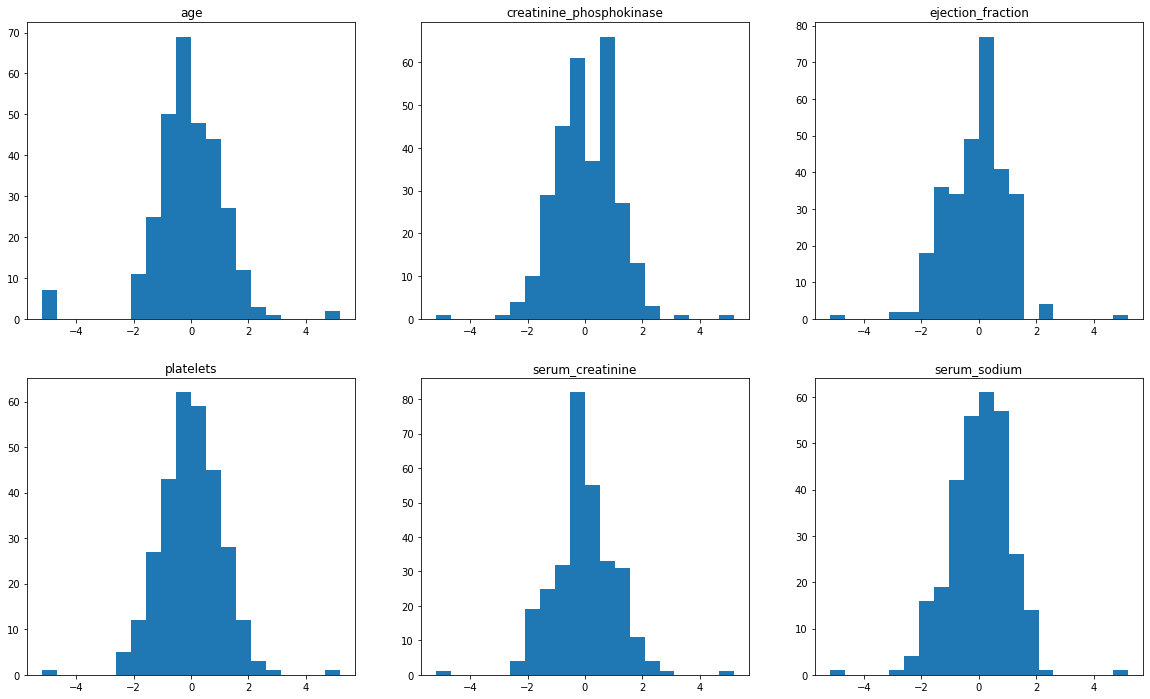

In [15]:
data_quantile_normal_scaled = preprocessing.QuantileTransformer(n_quantiles = 100,random_state=0, output_distribution="normal").fit_transform(data)
df_quantile_normal_scaled = pd.DataFrame(data=data_quantile_normal_scaled, columns=[
    'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'
])
plot_data_frame(df_quantile_normal_scaled)

### Приведение к нормальному распределению с помощью PowerTransformer

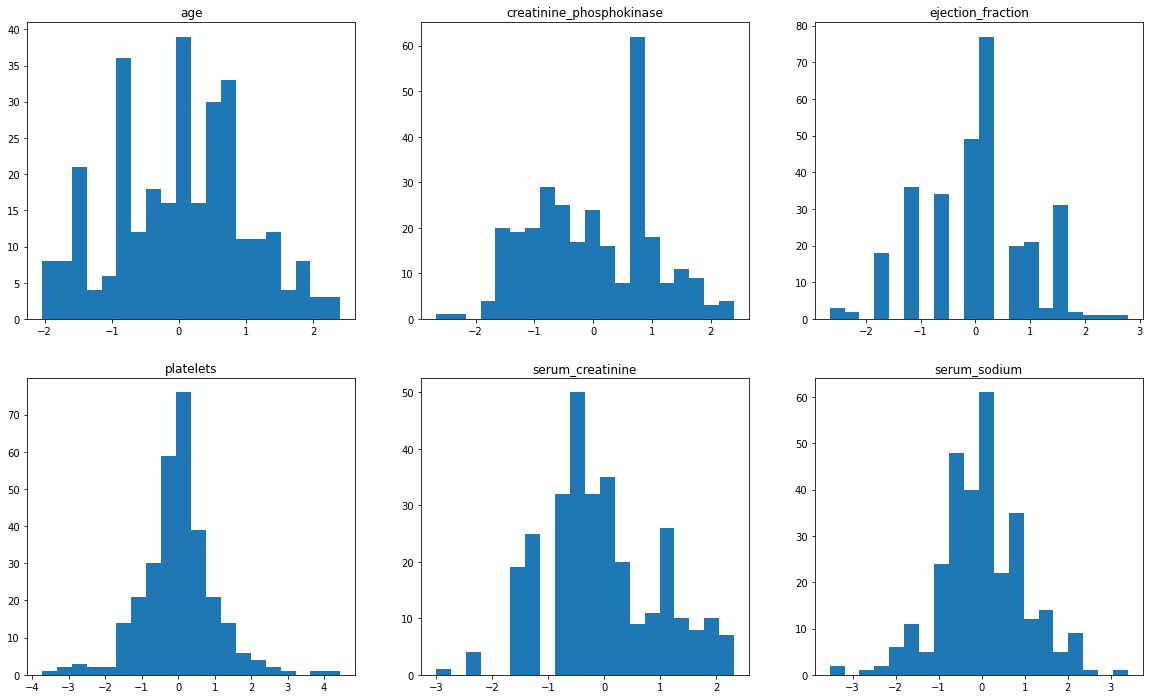

In [16]:
data_power_transformer_scaled = preprocessing.PowerTransformer().fit_transform(data)
df_power_transformer_scaled = pd.DataFrame(data=data_power_transformer_scaled, columns=[
    'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'
])
plot_data_frame(df_power_transformer_scaled)

## Дискретизация признаков

### Дискретизация признаков с помощью KBinsDiscretizer

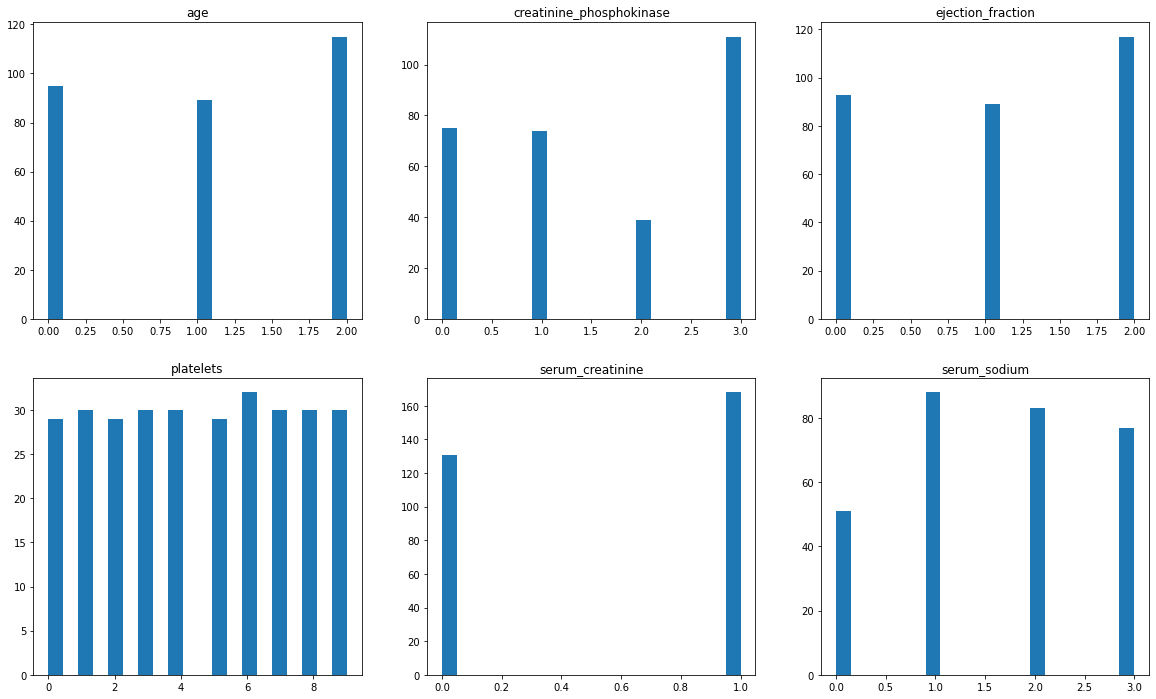

In [17]:
k_bin_discretizer = preprocessing.KBinsDiscretizer(n_bins=[3, 4, 3, 10, 2, 4], encode='ordinal').fit(data)
df_k_discrete_scaled = pd.DataFrame(
    k_bin_discretizer.transform(data),
    columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
)
plot_data_frame(df_k_discrete_scaled)

### Вывод интервалов

In [18]:
show_intervals(k_bin_discretizer.bin_edges_)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,"[40.0, 55.0]","[23.0, 116.5]","[14.0, 35.0]","[25100.0, 153000.0]","[0.5, 1.1]","[113.0, 134.0]"
1,"[55.0, 65.0]","[116.5, 250.0]","[35.0, 40.0]","[153000.0, 196000.0]","[1.1, 9.4]","[134.0, 137.0]"
2,"[65.0, 95.0]","[250.0, 582.0]","[40.0, 80.0]","[196000.0, 221000.0]",,"[137.0, 140.0]"
3,,"[582.0, 7861.0]",,"[221000.0, 237000.0]",,"[140.0, 148.0]"
4,,,,"[237000.0, 262000.0]",,
5,,,,"[262000.0, 265000.0]",,
6,,,,"[265000.0, 285200.0]",,
7,,,,"[285200.0, 319800.0]",,
8,,,,"[319800.0, 374599.99999999994]",,
9,,,,"[374599.99999999994, 850000.0]",,
